# Home Credit Default Risk 5

## Automated Feature Engineering Basics (Featuretools)

Kaggle Question:

https://www.kaggle.com/c/home-credit-default-risk/data

This work is to further explore home credit default risk following:

https://github.com/dongzhang84/Kaggle/blob/master/Home%20Credit%20Default%20Risk/Home_Credit_1.ipynb

https://github.com/dongzhang84/Kaggle/blob/master/Home%20Credit%20Default%20Risk/Home_Credit_2.ipynb

https://github.com/dongzhang84/Kaggle/blob/master/Home%20Credit%20Default%20Risk/Home_Credit_3.ipynb

https://github.com/dongzhang84/Kaggle/blob/master/Home%20Credit%20Default%20Risk/Home_Credit_4.ipynb

Reference: 

https://www.kaggle.com/willkoehrsen/automated-feature-engineering-basics

In [1]:
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

![dataset](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [2]:
# Load dataset

df_train = pd.read_csv('data/application_train.csv')\
           .sort_values('SK_ID_CURR').reset_index(drop = True).loc[:1000, :]

print('df_train shape:', df_train.shape)

df_test = pd.read_csv('data/application_test.csv')\
          .sort_values('SK_ID_CURR').reset_index(drop = True).loc[:1000, :]

print('df_test shape:', df_test.shape)
                                                                                                         
df_bureau = pd.read_csv('data/bureau.csv')\
           .sort_values(['SK_ID_CURR', 'SK_ID_BUREAU']).reset_index(drop = True).loc[:1000, :]

print('df_bureau shape:', df_bureau.shape)

df_bb = pd.read_csv('data/bureau_balance.csv').sort_values('SK_ID_BUREAU')\
        .reset_index(drop = True).loc[:1000, :]

print('df_bureau_balance shape:', df_bb.shape)

df_cash = pd.read_csv('data/POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])\
        .reset_index(drop = True).loc[:1000, :]

print('df_cash shape:', df_cash.shape)


df_credit = pd.read_csv('data/credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])\
        .reset_index(drop = True).loc[:1000, :]

print('df_credit_card_balance shape:', df_credit.shape)


df_previous = pd.read_csv('data/previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])\
             .reset_index(drop = True).loc[:1000, :]

print('df_previous shape:', df_previous.shape)

df_installments = pd.read_csv('data/installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV'])\
                 .reset_index(drop = True).loc[:1000, :]

print('df_installments shape:', df_installments.shape)

df_train shape: (1001, 122)
df_test shape: (1001, 121)
df_bureau shape: (1001, 17)
df_bureau_balance shape: (1001, 3)
df_cash shape: (1001, 8)
df_credit_card_balance shape: (1001, 23)
df_previous shape: (1001, 37)
df_installments shape: (1001, 8)


In [3]:
# Add identifying column
df_train['set'] = 'train'
df_test['set'] = 'test'
df_test["TARGET"] = np.nan

# Append the dataframes
df_app = df_train.append(df_test, ignore_index = True)

In [4]:
df_app.shape

(2002, 123)

## Featuretools Basics

In [5]:
# Entity set with id applications
es = ft.EntitySet(id = 'clients')

In [6]:
es

Entityset: clients
  Entities:
  Relationships:
    No relationships

In [7]:
# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'df_app', dataframe = df_app, index = 'SK_ID_CURR')

In [8]:
es

Entityset: clients
  Entities:
    df_app [Rows: 2002, Columns: 123]
  Relationships:
    No relationships

In [9]:
es = es.entity_from_dataframe(entity_id = 'df_bureau', dataframe = df_bureau, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'df_previous', dataframe = df_previous, index = 'SK_ID_PREV')

# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'df_bb', dataframe = df_bb, 
                              make_index = True, index = 'bureaubalance_index')

es = es.entity_from_dataframe(entity_id = 'df_cash', dataframe = df_cash, 
                              make_index = True, index = 'cash_index')

es = es.entity_from_dataframe(entity_id = 'df_installments', dataframe = df_installments,
                              make_index = True, index = 'installments_index')

es = es.entity_from_dataframe(entity_id = 'credit', dataframe = df_credit,
                              make_index = True, index = 'credit_index')

In [10]:
es

Entityset: clients
  Entities:
    df_app [Rows: 2002, Columns: 123]
    df_bureau [Rows: 1001, Columns: 17]
    df_previous [Rows: 1001, Columns: 37]
    df_bb [Rows: 1001, Columns: 4]
    df_cash [Rows: 1001, Columns: 9]
    df_installments [Rows: 1001, Columns: 9]
    credit [Rows: 1001, Columns: 24]
  Relationships:
    No relationships

In [11]:
df_app.iloc[:, 111:115].head()

,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE
0,100002,1.0,0.0149,"Stone, brick"
1,100003,0.0,0.0714,Block
2,100004,0.0,NaN,NaN
3,100006,0.0,NaN,NaN
4,100007,0.0,NaN,NaN


# Relationships

In [12]:
print('Parent: app, Parent Variable: SK_ID_CURR\n\n', df_app.iloc[:, 111:115].head())
print('\nChild: bureau, Child Variable: SK_ID_CURR\n\n', df_bureau.iloc[10:30, :4].head())

Parent: app, Parent Variable: SK_ID_CURR

    SK_ID_CURR  TARGET  TOTALAREA_MODE WALLSMATERIAL_MODE
0      100002     1.0          0.0149       Stone, brick
1      100003     0.0          0.0714              Block
2      100004     0.0             NaN                NaN
3      100006     0.0             NaN                NaN
4      100007     0.0             NaN                NaN

Child: bureau, Child Variable: SK_ID_CURR

     SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY
10      100002       6158905        Closed      currency 1
11      100002       6158906        Closed      currency 1
12      100002       6158907        Closed      currency 1
13      100002       6158908        Closed      currency 1
14      100002       6158909        Active      currency 1


In [13]:
# Relationship between app and bureau
r_app_bureau = ft.Relationship(es['df_app']['SK_ID_CURR'], es['df_bureau']['SK_ID_CURR'])

In [14]:
r_app_bureau

<Relationship: df_bureau.SK_ID_CURR -> df_app.SK_ID_CURR>

In [15]:
# Relationship between bureau and bureau balance
r_bureau_balance = ft.Relationship(es['df_bureau']['SK_ID_BUREAU'], es['df_bb']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['df_app']['SK_ID_CURR'], es['df_previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['df_previous']['SK_ID_PREV'], es['df_cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['df_previous']['SK_ID_PREV'], es['df_installments']['SK_ID_PREV'])

In [16]:
r_previous_credit = ft.Relationship(es['df_previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

In [17]:
# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
# Print out the EntitySet
es

Entityset: clients
  Entities:
    df_app [Rows: 2002, Columns: 123]
    df_bureau [Rows: 1001, Columns: 17]
    df_previous [Rows: 1001, Columns: 37]
    df_bb [Rows: 1001, Columns: 4]
    df_cash [Rows: 1001, Columns: 9]
    df_installments [Rows: 1001, Columns: 9]
    credit [Rows: 1001, Columns: 24]
  Relationships:
    df_bureau.SK_ID_CURR -> df_app.SK_ID_CURR
    df_bb.SK_ID_BUREAU -> df_bureau.SK_ID_BUREAU
    df_previous.SK_ID_CURR -> df_app.SK_ID_CURR
    df_cash.SK_ID_PREV -> df_previous.SK_ID_PREV
    df_installments.SK_ID_PREV -> df_previous.SK_ID_PREV
    credit.SK_ID_PREV -> df_previous.SK_ID_PREV

# Feature Primitives

- **Aggregation**: function that groups together child datapoints for each parent and then calculates a statistic such as mean, min, max, or standard deviation. An example is calculating the maximum previous loan amount for each client. An aggregation works across multiple tables using relationships between tables.

- **Transformation**: an operation applied to one or more columns in a single table. An example would be taking the absolute value of a column, or finding the difference between two columns in one table.

In [18]:
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100

In [19]:
primitives[primitives['type'] == 'aggregation']

,name,type,description
0,any,aggregation,Determines if any value is 'True' in a list.
1,max,aggregation,"Calculates the highest value, ignoring `NaN` values."
2,first,aggregation,Determines the first value in a list.
3,mode,aggregation,Determines the most commonly repeated value.
4,sum,aggregation,"Calculates the total addition, ignoring `NaN`."
5,skew,aggregation,Computes the extent to which a distribution differs from a normal distribution.
6,time_since_first,aggregation,Calculates the time elapsed since the first datetime (in seconds).
7,percent_true,aggregation,Determines the percent of `True` values.
8,count,aggregation,"Determines the total number of values, excluding `NaN`."
9,all,aggregation,Calculates if all values are 'True' in a list.


In [20]:
primitives[primitives['type'] == 'transform']

,name,type,description
22,multiply_numeric,transform,Element-wise multiplication of two lists.
23,isin,transform,Determines whether a value is present in a provided list.
24,less_than_equal_to,transform,Determines if values in one list are less than or equal to another list.
25,hour,transform,Determines the hour value of a datetime.
26,modulo_numeric,transform,Element-wise modulo of two lists.
27,subtract_numeric_scalar,transform,Subtract a scalar from each element in the list.
28,num_words,transform,Determines the number of words in a string by counting the spaces.
29,divide_numeric_scalar,transform,Divide each element in the list by a scalar.
30,less_than,transform,Determines if values in one list are less than another list.
31,time_since_previous,transform,Compute the time since the previous entry in a list.


# Deep Feature Synthesis

In [21]:
# Default primitives from featuretools
default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
default_trans_primitives =  ["day", "year", "month", "weekday", "haversine", "num_words", "num_characters"]

In [22]:
# DFS with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'df_app',
                       trans_primitives = default_trans_primitives,
                       agg_primitives = default_agg_primitives, 
                       max_depth = 2, features_only=True)

print('%d Total Features' % len(feature_names))

2221 Total Features


In [23]:
# DFS with default primitives
feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'df_app',
                                       trans_primitives = default_trans_primitives,
                                       agg_primitives=default_agg_primitives, 
                                       max_depth = 2, features_only=False, verbose = True)


Built 2221 features
Elapsed: 00:16 | Progress: 100%|██████████


In [24]:
feature_matrix.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,MODE(credit.df_previous.FLAG_LAST_APPL_PER_CONTRACT),MODE(credit.df_previous.NAME_CLIENT_TYPE),MODE(credit.df_previous.PRODUCT_COMBINATION),MODE(credit.df_previous.NAME_GOODS_CATEGORY),MODE(credit.df_previous.CODE_REJECT_REASON),MODE(credit.df_previous.CHANNEL_TYPE),MODE(credit.df_previous.WEEKDAY_APPR_PROCESS_START),MODE(credit.df_previous.NAME_YIELD_GROUP),MODE(credit.df_previous.NAME_PRODUCT_TYPE),MODE(credit.df_previous.NAME_PORTFOLIO)
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Repeater,Card X-Sell,XNA,XAP,Credit and cash offices,THURSDAY,XNA,x-sell,Cards
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
feature_names[-20:]

[<Feature: NUM_UNIQUE(credit.df_previous.NAME_YIELD_GROUP)>,
 <Feature: NUM_UNIQUE(credit.df_previous.NAME_PRODUCT_TYPE)>,
 <Feature: NUM_UNIQUE(credit.df_previous.NAME_PORTFOLIO)>,
 <Feature: MODE(credit.df_previous.NAME_CONTRACT_STATUS)>,
 <Feature: MODE(credit.df_previous.NAME_CONTRACT_TYPE)>,
 <Feature: MODE(credit.df_previous.NAME_TYPE_SUITE)>,
 <Feature: MODE(credit.df_previous.NAME_PAYMENT_TYPE)>,
 <Feature: MODE(credit.df_previous.NAME_SELLER_INDUSTRY)>,
 <Feature: MODE(credit.df_previous.NAME_CASH_LOAN_PURPOSE)>,
 <Feature: MODE(credit.df_previous.SK_ID_CURR)>,
 <Feature: MODE(credit.df_previous.FLAG_LAST_APPL_PER_CONTRACT)>,
 <Feature: MODE(credit.df_previous.NAME_CLIENT_TYPE)>,
 <Feature: MODE(credit.df_previous.PRODUCT_COMBINATION)>,
 <Feature: MODE(credit.df_previous.NAME_GOODS_CATEGORY)>,
 <Feature: MODE(credit.df_previous.CODE_REJECT_REASON)>,
 <Feature: MODE(credit.df_previous.CHANNEL_TYPE)>,
 <Feature: MODE(credit.df_previous.WEEKDAY_APPR_PROCESS_START)>,
 <Feature: MO

### DFS with Selected Aggregation Primitives

In [26]:
# Specify the aggregation primitives
feature_matrix_spec, feature_names_spec = ft.dfs(entityset = es, target_entity = 'df_app',  
                                                 agg_primitives = ['sum', 'count', 'min', 'max', 'mean', 'mode'], 
                                                 max_depth = 2, features_only = False, verbose = True)

Built 1215 features
Elapsed: 00:04 | Progress: 100%|██████████


In [27]:
feature_matrix_spec.head(10)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,MODE(credit.df_previous.FLAG_LAST_APPL_PER_CONTRACT),MODE(credit.df_previous.NAME_CLIENT_TYPE),MODE(credit.df_previous.PRODUCT_COMBINATION),MODE(credit.df_previous.NAME_GOODS_CATEGORY),MODE(credit.df_previous.CODE_REJECT_REASON),MODE(credit.df_previous.CHANNEL_TYPE),MODE(credit.df_previous.WEEKDAY_APPR_PROCESS_START),MODE(credit.df_previous.NAME_YIELD_GROUP),MODE(credit.df_previous.NAME_PRODUCT_TYPE),MODE(credit.df_previous.NAME_PORTFOLIO)
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Y,Repeater,Card X-Sell,XNA,XAP,Credit and cash offices,THURSDAY,XNA,x-sell,Cards
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,27517.5,490495.5,454500.0,99000.0,0.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,41301.0,1560726.0,1395000.0,171000.0,0.0,0.0,1.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100010,42075.0,1530000.0,1530000.0,360000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100011,33826.5,1019610.0,913500.0,112500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Y,Repeater,Card X-Sell,XNA,XAP,Contact center,SATURDAY,XNA,x-sell,Cards


In [28]:
#feature_matrix_spec.corr()

## Feature Performance Experiments

- Control: using only data from the application dataset
- Test One: manual feature engineering using only the application, bureau and bureau_balance data
- Test Two: manual feature engineering using all datasets
- Test Three: featuretools default features (in the feature_matrix)
- Test Four: featuretools specified features (in the feature_matrix_spec)
- Test Five: featuretools specified features combined with manual feature engineering

In [29]:
correlations_spec = feature_matrix_spec.corr()

In [30]:
correlations_spec.index.name = 'Variable'
correlations_spec.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,MEAN(credit.df_previous.DAYS_LAST_DUE_1ST_VERSION),MEAN(credit.df_previous.AMT_GOODS_PRICE),MEAN(credit.df_previous.SELLERPLACE_AREA),MEAN(credit.df_previous.DAYS_LAST_DUE),MEAN(credit.df_previous.DAYS_DECISION),MEAN(credit.df_previous.RATE_DOWN_PAYMENT),MEAN(credit.df_previous.RATE_INTEREST_PRIVILEGED),MEAN(credit.df_previous.DAYS_TERMINATION),MEAN(credit.df_previous.AMT_DOWN_PAYMENT),MODE(credit.df_previous.SK_ID_CURR)
Variable,,,,,,,,,,,,,,,,,,,,,
AMT_ANNUITY,1.000000,0.771190,0.773800,0.486044,-0.015092,-0.005877,0.034694,0.014224,-0.004661,-0.006722,...,NaN,-0.146928,-0.031129,-0.116647,-0.037783,NaN,NaN,-0.117605,NaN,-0.174200
AMT_CREDIT,0.771190,1.000000,0.986906,0.413117,0.004833,-0.019934,0.105442,-0.041711,-0.003046,-0.018648,...,NaN,-0.368177,-0.049263,-0.188291,-0.180962,NaN,NaN,0.085355,NaN,-0.266135
AMT_GOODS_PRICE,0.773800,0.986906,1.000000,0.418351,0.005681,-0.018235,0.101398,-0.045876,0.001252,-0.024768,...,NaN,-0.302078,-0.099993,-0.218833,-0.226877,NaN,NaN,0.027397,NaN,-0.302222
AMT_INCOME_TOTAL,0.486044,0.413117,0.418351,1.000000,-0.028114,-0.019594,0.076547,0.013647,-0.009641,0.021565,...,NaN,-0.162957,-0.154276,-0.008415,-0.037912,NaN,NaN,-0.221257,NaN,0.097242
AMT_REQ_CREDIT_BUREAU_DAY,-0.015092,0.004833,0.005681,-0.028114,1.000000,0.080274,-0.010060,0.020590,0.402707,0.052379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
correlations_target = correlations_spec.sort_values('TARGET')['TARGET']
# Most negative correlations
correlations_target.head()

Variable
MIN(df_previous.MAX(credit.MONTHS_BALANCE))        -0.363774
MEAN(df_previous.MAX(credit.MONTHS_BALANCE))       -0.363774
MAX(credit.MONTHS_BALANCE)                         -0.363774
MIN(df_installments.SK_ID_CURR)                    -0.349691
MAX(df_previous.MIN(df_installments.SK_ID_CURR))   -0.349691
Name: TARGET, dtype: float64

In [32]:
# Most positive correlations
correlations_target.dropna().tail()

Variable
MIN(df_previous.MAX(df_cash.CNT_INSTALMENT_FUTURE))    0.643478
MIN(df_cash.df_previous.CNT_PAYMENT)                   0.649665
MIN(df_previous.MEAN(df_cash.CNT_INSTALMENT))          0.649785
MIN(df_installments.df_previous.CNT_PAYMENT)           0.660703
TARGET                                                 1.000000
Name: TARGET, dtype: float64

### Visualize Distribution of Correlated Variables

In [33]:
features_sample = feature_matrix

In [34]:
def kde_target_plot(df, feature):
    """Kernel density estimate plot of a feature colored
    by value of the target."""
    
    # Need to reset index for loc to workBU
    df = df.reset_index()
    plt.figure(figsize = (10, 6))
    plt.style.use('fivethirtyeight')
    
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of Feature by Target Value')
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    plt.show()

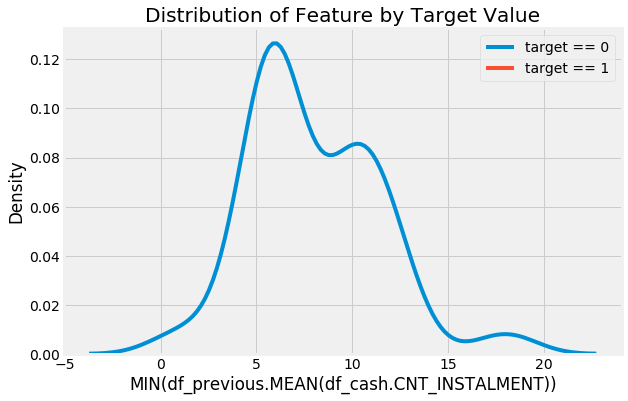

In [35]:
kde_target_plot(features_sample, feature = 'MIN(df_previous.MEAN(df_cash.CNT_INSTALMENT))')

In [36]:
feature_matrix.TARGET.value_counts()

0.0    931
1.0     70
Name: TARGET, dtype: int64

### Collinear Features

In [37]:
threshold = 0.9

correlated_pairs = {}

# Iterate through the columns
for col in correlations_spec:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in list(correlations_spec.index[correlations_spec[col] > threshold]) 
                            if x != col]
    correlated_pairs[col] = above_threshold_vars

In [38]:
correlated_pairs['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)']

['MEAN(df_cash.CNT_INSTALMENT)',
 'MAX(df_installments.NUM_INSTALMENT_NUMBER)',
 'MEAN(df_installments.NUM_INSTALMENT_NUMBER)',
 'MEAN(credit.AMT_PAYMENT_CURRENT)',
 'MEAN(credit.AMT_DRAWINGS_CURRENT)',
 'SUM(df_previous.MEAN(credit.AMT_PAYMENT_CURRENT))',
 'SUM(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))',
 'SUM(df_previous.MEAN(credit.AMT_DRAWINGS_CURRENT))',
 'MIN(df_previous.MEAN(credit.AMT_PAYMENT_CURRENT))',
 'MIN(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))',
 'MIN(df_previous.MEAN(credit.AMT_DRAWINGS_CURRENT))',
 'MAX(df_previous.MEAN(credit.AMT_PAYMENT_CURRENT))',
 'MAX(df_previous.MEAN(df_installments.NUM_INSTALMENT_NUMBER))',
 'MAX(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))',
 'MAX(df_previous.MEAN(credit.AMT_DRAWINGS_CURRENT))',
 'MAX(df_previous.MIN(df_cash.CNT_INSTALMENT))',
 'MEAN(df_previous.MEAN(credit.AMT_PAYMENT_CURRENT))',
 'MEAN(df_previous.MEAN(df_installments.NUM_INSTALMENT_NUMBER))',
 'MEAN(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURREN

In [39]:
correlations_spec['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)'].sort_values(ascending=False).head()

Variable
MIN(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))     1.0
SUM(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))     1.0
MEAN(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))    1.0
MAX(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))     1.0
MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)                      1.0
Name: MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT), dtype: float64

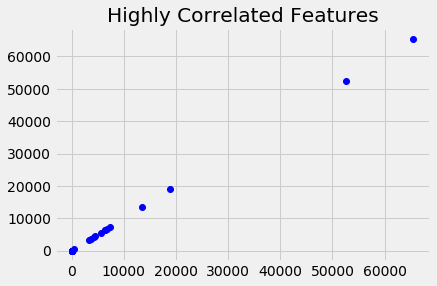

In [40]:
plt.plot(features_sample['MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT)'], features_sample['MAX(df_previous.MEAN(credit.AMT_PAYMENT_TOTAL_CURRENT))'], 'bo')
plt.title('Highly Correlated Features');